In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import plotly.express as px
import pprint
import operator
import scipy.stats as stats
import pylab as py

## Reading in and Cleaning Data

In [7]:
# read in data and subset for desired features 
dogs_df = pd.read_csv('dogs.csv')
dogs_df = dogs_df[['id', 'delta_time_minutes', 'age', 'gender', 'size', 'coat', 'primary_breed', 'primary_color', 'compatible_children', 'compatible_dogs', 'compatible_cats']]

# drop null values and reset index
dogs_df.dropna(inplace=True)
dogs_df.reset_index()
dogs_df

,id,delta_time_minutes,age,gender,size,coat,primary_breed,primary_color,compatible_children,compatible_dogs,compatible_cats
0,59313263,1213.833333,Adult,Male,Small,Short,Chihuahua,Yellow / Tan / Blond / Fawn,True,True,True
2,59313253,733.033333,Young,Male,Medium,Medium,Shetland Sheepdog / Sheltie,Merle (Blue),False,True,True
8,59313185,1269.450000,Young,Female,Large,Short,Anatolian Shepherd,Bicolor,True,True,True
10,59263354,1127.616667,Baby,Female,Medium,Short,Coonhound,Black,True,True,True
11,59313109,119.766667,Young,Male,Medium,Short,Beagle,"Tricolor (Brown, Black, & White)",True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4927,59262866,23.766667,Young,Female,Medium,Short,Pit Bull Terrier,Black,True,True,True
4931,59262859,872.433333,Young,Male,Medium,Long,Goldendoodle,Golden,True,True,True
4934,59262849,1288.566667,Baby,Female,Medium,Medium,German Shepherd Dog,Black,True,True,False
4935,59262848,1272.966667,Senior,Male,Large,Short,Black Labrador Retriever,Black,True,True,True


In [8]:
# make dummy columns 
dogs_df_dummies = pd.get_dummies(data=dogs_df, 
                                 columns=['age', 'gender', 'size', 'coat', 'primary_breed','primary_color'])

## Build Random Forest Regressor Functions

In [4]:
def random_forest_regress_default(x_feat_list, y_col, df): 
    """Takes in dataframe and list of x features used to build random forest regressor predicting y column 
        values. Random Forest Regressor is initialized to have default arguments only.
    
        Args: 
            x_feat_list(list): List of column names in dataframe to be used as x features in model 
            y_col (string): String of column name in dataframe to be used as y values in model
            df (dataframe): A pandas dataframe containing the data to build the model
            
        Returns: 
            feat_importances (list): A list of the feature importance of each feature used in the model 
            converted_dict (dictionary): A dictionary with the feature as the key and the feature importance of 
                                         that feature as the value, in alphabetical order by key
            r2 (float): The R2 score of the model 
            mse (float): The MSE of the model  
            residuals (array): A numpy array with the residuals of the model (errors)
    """

    # split into x and y data
    X = df.loc[:, x_feat_list].values
    y = df.loc[:, y_col].values

    # split into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    # initialize random forest regressor 
    regressor = RandomForestRegressor()

    # fit random forest regressor
    regressor.fit(X_train, y_train)

    # predict using regressor 
    y_pred = regressor.predict(X_test)
    
    # calculate accuracy scores 
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # build dictionary of model features and their importances 
    feat_importances = regressor.feature_importances_
    feat_import_dict = {}
    for index, item in enumerate(feat_importances):
        feat = x_feat_list[index]
        feat_import_dict[feat] = item 
    
    # sort dictionary in alphabetical order by key 
    sorted_feat_import_dict = sorted(feat_import_dict.items(), key=lambda x:x[1], reverse=True)
    converted_dict = dict(sorted_feat_import_dict)
    
    # calculate residuals 
    residuals = y_test - y_pred
    
    return feat_importances, converted_dict, r2, mse, residuals

In [5]:
def random_forest_regress(x_feat_list, y_col, df): 
    """Takes in dataframe and list of x features used to build random forest regressor predicting y column 
        values. Random Forest Regressor is initialized with some arguments changed from defaults.
    
        Args: 
            x_feat_list(list): List of column names in dataframe to be used as x features in model 
            y_col (string): String of column name in dataframe to be used as y values in model
            df (dataframe): A pandas dataframe containing the data to build the model
            
        Returns: 
            feat_importances (list): A list of the feature importance of each feature used in the model 
            converted_dict (dictionary): A dictionary with the feature as the key and the feature importance of 
                                         that feature as the value, in alphabetical order of the key
            r2 (float): The R2 score of the model 
            mse (float): The MSE of the model  
            residuals (array): A numpy array with the residuals of the model (errors)
    """


    # split into x and y data
    X = df.loc[:, x_feat_list].values
    y = df.loc[:, y_col].values

    # split into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    # initialize random forest regressor 
    regressor = RandomForestRegressor(n_estimators=100, 
                                     bootstrap=True, oob_score=True, random_state=42)

    # fit random forest regressor
    regressor.fit(X_train, y_train)

    # predict using regressor 
    y_pred = regressor.predict(X_test)
    
    # calculate accuracy scores 
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # build dictionary of model features and their importances 
    feat_importances = regressor.feature_importances_
    feat_import_dict = {}
    for index, item in enumerate(feat_importances):
        feat = x_feat_list[index]
        feat_import_dict[feat] = item 
    
    # sort dictionary in alphabetical order by key
    sorted_dict = dict(sorted(feat_import_dict.items(), key=lambda item: item[1], reverse=True))

    
    # calculate residuals
    residuals = y_test - y_pred
    
    return feat_importances, sorted_dict, r2, mse, residuals

## Conduct Tests on Random Forest Regressor Model 

### TEST 1.a: All X Features
Using original regressor function (random_forest_regress), which passes non-default arguments to random forest regressor model upon initialization. All X features are used in this test (all columns in dataframe, except delta_time_minutes and id).

In [6]:
# define x_feat_list as all the possible features in the model (columns in dataframe) 
x_feat_list = ['compatible_children', 'compatible_dogs', 'compatible_cats', 
               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 
               'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 
               'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire', 'primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier', 'primary_color_Apricot / Beige', 
               'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
               'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
               'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
               'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
               'primary_color_Yellow / Tan / Blond / Fawn']

In [7]:
# run random forest regressor using non-default model 
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress(x_feat_list=x_feat_list, y_col='delta_time_minutes', df=dogs_df_dummies)

In [8]:
# print feature importance dictionary
pprint.pprint(feat_import_dict)

{'age_Adult': 0.02395360426843699,
 'age_Baby': 0.030174291595549567,
 'age_Senior': 0.011958386024141452,
 'age_Young': 0.021450474868300793,
 'coat_Curly': 0.005366294826378979,
 'coat_Hairless': 0.0010517067100437527,
 'coat_Long': 0.013282187553526927,
 'coat_Medium': 0.023010828057869283,
 'coat_Short': 0.019846155419057064,
 'coat_Wire': 0.006228527423659871,
 'compatible_cats': 0.021746292527822644,
 'compatible_children': 0.005314925890490117,
 'compatible_dogs': 0.006637048851091096,
 'gender_Female': 0.025633660779341278,
 'gender_Male': 0.02525875060855213,
 'primary_breed_Affenpinscher': 0.0011428693904000765,
 'primary_breed_Alaskan Malamute': 0.00012415025623410333,
 'primary_breed_American Bulldog': 0.0070389677943720665,
 'primary_breed_American Bully': 0.003907157455578684,
 'primary_breed_American Eskimo Dog': 0.001285733663046808,
 'primary_breed_American Staffordshire Terrier': 0.009931632063633806,
 'primary_breed_Anatolian Shepherd': 0.002316414315456361,
 'primar

In [9]:
# print accuracy metrics
print(f'''For original random forest regressor function:\nR2: {r2}, MSE: {mse}''')

For original random forest regressor function:
R2: -0.14361363071107403, MSE: 266444.4669252232


### TEST 1.b: All X Features
Using default regressor function (random_forest_regress_default), which uses default arguments to initialize the random forest regressor model. All X features are used in this test (all columns in dataframe, except delta_time_minutes and id).
- Note that default regressor function is used for the rest of this analysis as it yields better accuracy metrics

In [16]:
# run random forest regressor and print accuracy metrics
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''For default random forest regressor function:\nR2: {r2}, MSE: {mse}''')

For default random forest regressor function:
R2: -0.12459918658335756, MSE: 262014.3925596888


In [17]:
# print feature importance dictionary 
pprint.pprint(feat_import_dict)

{'age_Adult': 0.022432133769015775,
 'age_Baby': 0.030891099372976585,
 'age_Senior': 0.01199645276310081,
 'age_Young': 0.022803178515203765,
 'coat_Curly': 0.00507358018619348,
 'coat_Hairless': 0.0007699442706202124,
 'coat_Long': 0.011036466467860823,
 'coat_Medium': 0.022597161344840386,
 'coat_Short': 0.01984738206587531,
 'coat_Wire': 0.005673228422257637,
 'compatible_cats': 0.020554563790801922,
 'compatible_children': 0.005575796152419338,
 'compatible_dogs': 0.008577490061462497,
 'gender_Female': 0.025354703646387193,
 'gender_Male': 0.02508531626465484,
 'primary_breed_Affenpinscher': 0.0015752417191488921,
 'primary_breed_Alaskan Malamute': 0.00028545669435570137,
 'primary_breed_American Bulldog': 0.0066920529632222905,
 'primary_breed_American Bully': 0.003024110645147945,
 'primary_breed_American Eskimo Dog': 0.0015555807158992862,
 'primary_breed_American Staffordshire Terrier': 0.011334826981732566,
 'primary_breed_Anatolian Shepherd': 0.002160633604648773,
 'primary

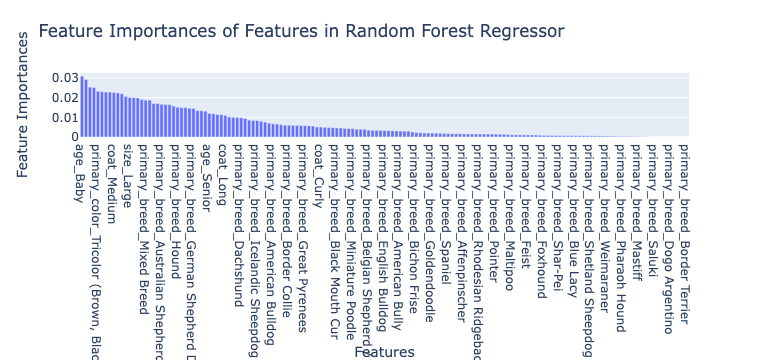

In [18]:
# plot feature importance
px.bar(x=x_feat_list, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

#### A NOTE ON CONSISTENCY
Because the Random Forest Regressor Model is random, the most important features are subject to change each time that the model is run. The following list of "most important features" was made by pulling the most important features from the above graph (those with the highest feature importances) in the most recent run of the model. This list of features is then used in our following analysis (linear regression). Please note that running the code again (as in when grading) may yield different feature importances, and therefore the below list may no longer match the most recent run of the model. This should be considered for the development of each of the feature lists in the following tests. 

In [66]:
# make a list of 15 features with highest feature importance and print
top_15_feats = ['age_Baby', 'gender_Male', 'primary_color_White / Cream', 'age_Adult', 'size_Large',
                'primary_breed_Chihuahua', 'size_Small', 'primary_color_Gray / Blue / Silver', 
                'primary_breed_Hound', 'primary_breed_Corgi', 
                'primary_breed_Australian Cattle Dog / Blue Heeler', 'primary_breed_Shepherd', 
                'coat_Long', 'primary_breed_Black Labrador Retriever', 'compatible_dogs']
                
pprint.pprint(top_15_feats)

['age_Baby',
 'gender_Male',
 'primary_color_White / Cream',
 'age_Adult',
 'size_Large',
 'primary_breed_Chihuahua',
 'size_Small',
 'primary_color_Gray / Blue / Silver',
 'primary_breed_Hound',
 'primary_breed_Corgi',
 'primary_breed_Australian Cattle Dog / Blue Heeler',
 'primary_breed_Shepherd',
 'coat_Long',
 'primary_breed_Black Labrador Retriever',
 'compatible_dogs']


### TEST 2: X Features only include Breeds 

In [20]:
# define list of x features to use 
x_feat_list_breeds = ['primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier']

In [28]:
# run random forest regressor and print accuracy metrics
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_breeds, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.07923777482602556, MSE: 251445.87811557282


In [29]:
# print feature importance dictionary
pprint.pprint(feat_import_dict)

{'primary_breed_Affenpinscher': 0.008435994425368751,
 'primary_breed_Alaskan Malamute': 0.00539068279783554,
 'primary_breed_American Bulldog': 0.02402353726912113,
 'primary_breed_American Bully': 0.006216157070099311,
 'primary_breed_American Eskimo Dog': 0.007623114695853407,
 'primary_breed_American Staffordshire Terrier': 0.03455361519253297,
 'primary_breed_Anatolian Shepherd': 0.007968878596434487,
 'primary_breed_Aussiedoodle': 0.005455625723793056,
 'primary_breed_Australian Cattle Dog / Blue Heeler': 0.008018200940708898,
 'primary_breed_Australian Kelpie': 0.00532170700343404,
 'primary_breed_Australian Shepherd': 0.020249103420852413,
 'primary_breed_Australian Terrier': 0.005556152292017976,
 'primary_breed_Basset Hound': 0.00581130280078075,
 'primary_breed_Beagle': 0.007968119064140603,
 'primary_breed_Belgian Shepherd / Malinois': 0.014687598191786083,
 'primary_breed_Bernese Mountain Dog': 0.005062305577241545,
 'primary_breed_Bichon Frise': 0.006445916717515207,
 'pr

In [30]:
# plot feature importance
px.bar(x=x_feat_list_breeds, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [115]:
# make a list of top 5 important features
test2_topfeats = ['primary_breed_Dutch Shepherd', 'primary_breed_Schnauzer', 'primary_breed_Retriever', 
                  'primary_breed_Doberman Pinscher', 'primary_breed_Standard Poodle']

### TEST 3: Features Only Include Colors

In [116]:
# create list of x features 
x_feat_list_colors = ['primary_color_Apricot / Beige', 
                       'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
                       'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
                       'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
                       'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
                       'primary_color_Yellow / Tan / Blond / Fawn']

In [117]:
# run random forest regressor and print accuracy scores
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_colors, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.003610580461324009, MSE: 233825.89970116373


In [34]:
# print feature dictionary
pprint.pprint(feat_import_dict)

{'primary_color_Apricot / Beige': 0.046110801451114264,
 'primary_color_Bicolor': 0.04518913952171399,
 'primary_color_Black': 0.018880836608090205,
 'primary_color_Brindle': 0.18144071404746304,
 'primary_color_Brown / Chocolate': 0.21285657885970902,
 'primary_color_Golden': 0.04049243968708884,
 'primary_color_Gray / Blue / Silver': 0.0836465326919106,
 'primary_color_Harlequin': 0.09998467403894874,
 'primary_color_Merle (Blue)': 0.09290140512880576,
 'primary_color_Merle (Red)': 0.06352057970754764,
 'primary_color_Red / Chestnut / Orange': 0.0266285582292421,
 'primary_color_Sable': 0.00030962110801483687,
 'primary_color_Tricolor (Brown, Black, & White)': 0.032989849447340285,
 'primary_color_White / Cream': 0.031874569275803816,
 'primary_color_Yellow / Tan / Blond / Fawn': 0.023173700197206916}


In [118]:
# plot feature importances
px.bar(x=x_feat_list_colors, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [119]:
# create list of top 5 color features
test3_topfeats = ['primary_color_Brown / Chocolate', 'primary_color_Brindle', 'primary_color_Harlequin',
                 'primary_color_Gray / Blue / Silver', 'primary_color_Merle (Blue)']

### TEST 4: All Features Except Colors and Breeds

In [45]:
# define x features
x_feat_list_nobreed_nocolor = ['compatible_children', 'compatible_dogs', 'compatible_cats', 
                               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 
                               'gender_Male', 'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 
                               'coat_Curly', 'coat_Hairless', 'coat_Long', 'coat_Medium', 'coat_Short', 
                               'coat_Wire']

In [46]:
# run random forest regressor and print accuracy metrics
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_nobreed_nocolor, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.14132757378355576, MSE: 265911.85066125426


In [47]:
# print feature importances
pprint.pprint(feat_import_dict)

{'age_Adult': 0.07357051598169656,
 'age_Baby': 0.06606569624529597,
 'age_Senior': 0.03465483942833245,
 'age_Young': 0.07098008710807711,
 'coat_Curly': 0.0308654436587593,
 'coat_Hairless': 0.002278512825571784,
 'coat_Long': 0.039712958716656074,
 'coat_Medium': 0.08277518384043708,
 'coat_Short': 0.06905541949845174,
 'coat_Wire': 0.02864709020000013,
 'compatible_cats': 0.09043396617237924,
 'compatible_children': 0.03588108244380167,
 'compatible_dogs': 0.04176892359098074,
 'gender_Female': 0.05246390533930321,
 'gender_Male': 0.05914953224919579,
 'size_Extra Large': 0.025818967185783852,
 'size_Large': 0.07146061313682531,
 'size_Medium': 0.06374615228018352,
 'size_Small': 0.06067111009826843}


In [48]:
# plot features importances
px.bar(x=x_feat_list_nobreed_nocolor, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [49]:
test4_topfeats = ['compatible_cats', 'coat_Medium', 'age_Adult', 'size_Large', 'age_Young']

## Build Plotting Functions for Linear Regression

In [13]:
def plot_residuals(Xtest, ytest, y_preds, feat_list): 
    """Takes in actual X and y values and y predictions and plots residuals to demonstrate assumptions of using 
        a linear regression. 
        
        Args: 
            Xtest(array): a numpy array with the test X values for the regression
            ytest (array): a numpy array with the test y values for the regression (actual)
            y_preds (array): a numpy array with the predicted y values based on the Xtest values 
        
        Returns: 
            None, just plots
    """
    
    # calculate residuals
    residuals = ytest - y_preds
    
    # determine the number of rows for the subplot
    num_features = len(feat_list)
    num_rows = (num_features + 1) // 2 
    
    # initialize subplot
    fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, 4 * num_rows))
    
    # plot index vs. residuals (independence plot)
    axs[0, 0].scatter(x=range(len(ytest)), y=residuals)
    axs[0, 0].set_xlabel('index')
    axs[0, 0].set_ylabel('residuals')
    axs[0, 0].set_title("Checking Independence")
    
    # plot residuals against x features 
    for idx, plot in enumerate(feat_list):
        axs[(idx + 1) // 2, (idx + 1) % 2].scatter(x=Xtest[:, idx], y=residuals)
        axs[(idx + 1) // 2, (idx + 1) % 2].set_xlabel(plot)
    
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    plt.show()
    
    # plot distribution of residuals
    plt.figure(figsize=(8, 4))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Distribution of Errors")
    plt.show()
    
    return


## Test Linear Regressions on Important Features from Random Forest Regressor

<center>The below equation demonstrates the line of best fit for all of our trials of the linear regression:</center>

$$\hat{y} = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + ... + b_nx_n $$

$$ \hat{y} = delta\_time\_minutes $$
$$x_1 = X\,Feature\,1$$
$$x_2 = X\,Feature\,2 $$
$$x_3 = X\,Feature\,3 $$
$$\cdot$$
$$\cdot$$
$$\cdot$$
$$x_n = X\,Feature\,n $$

### TRIAL 1: Linear Regression on Top 15 Feature Importances from Test 1.b
Using top 15 most important features to the Random Forest Regressor Model from Test 1.b (top_15_feats), run a linear regression to determine the coefficients for each feature, in order to determine if the feature has a positive or negative influence on time to be adopted. 

In [96]:
# create X and Y arrays
X = dogs_df_dummies[top_15_feats].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 246361.20366215
The R2 score for the sklearn cross validated model is 0.001


In [97]:
# determine coefficients and y intercept
coefs = train_model_dogs.coef_
y_int = train_model_dogs.intercept_

In [98]:
# print out the coefficients and their corresponding feature 
print(f'''For the line of best fit for Trial 1, the:\ny-int: {y_int}\n''')
for index, item in enumerate(top_15_feats):
     print(f'''{item} coefficient: {round(coefs[index], 3)}\n''')
    

For the line of best fit for Trial 1, the:
y-int: 704.4733338022313

age_Baby coefficient: 39.84

gender_Male coefficient: 10.11

primary_color_White / Cream coefficient: -0.018

age_Adult coefficient: 24.504

size_Large coefficient: 73.86

primary_breed_Chihuahua coefficient: -24.718

size_Small coefficient: 102.188

primary_color_Gray / Blue / Silver coefficient: 96.342

primary_breed_Hound coefficient: -155.527

primary_breed_Corgi coefficient: 109.73

primary_breed_Australian Cattle Dog / Blue Heeler coefficient: 78.644

primary_breed_Shepherd coefficient: 77.539

coat_Long coefficient: 177.282

primary_breed_Black Labrador Retriever coefficient: -50.61

compatible_dogs coefficient: -38.828



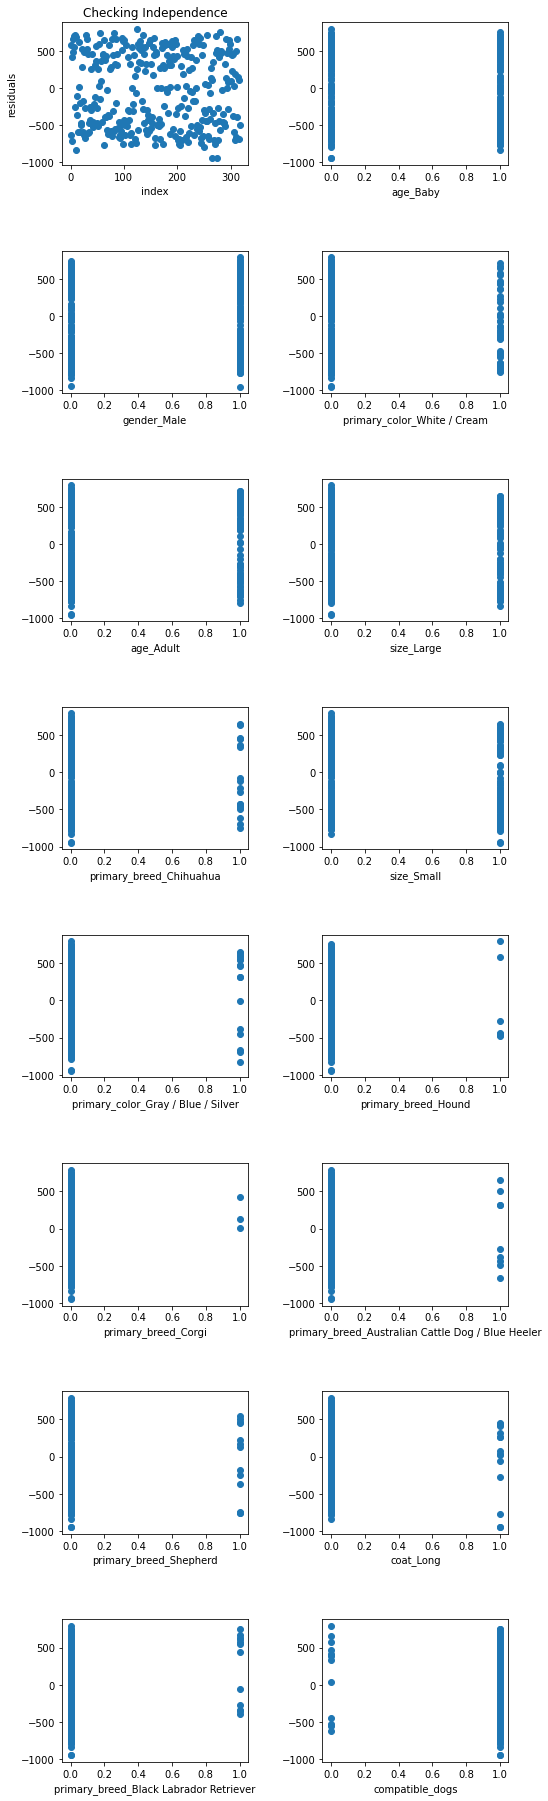

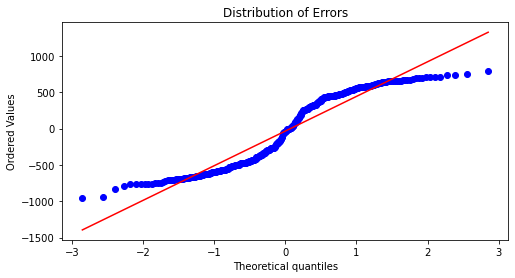

In [99]:
# plot residuals
plot_residuals(Xtest, ytest, y_preds, feat_list=top_15_feats)

### TRIAL 2: Linear Regression on Top 5 Feature Importances from Test 2, 3, and 4
Using the top 5 important features from Test 2, the top 5 important features from Test 3, and the the top 5 important features from Test 4 as our x values, we will run a linear regression in order to determine the coefficients for each feature, and determine if the feature has a positive or negative influence on time to be adopted. 

In [101]:
# combine lists of top 5 features from Tests 2-4 into one list 
topfeats_tests = test2_topfeats + test3_topfeats + test4_topfeats

In [102]:
# create X and Y arrays
X = dogs_df_dummies[topfeats_tests].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 233201.83554910033
The R2 score for the sklearn cross validated model is -0.006


In [103]:
# determine coefficients and y intercept
coefs = train_model_dogs.coef_
y_int = train_model_dogs.intercept_

In [104]:
# print out the coefficients and their corresponding feature 
print(f'''For the line of best fit for Trial 2, the:\ny-int: {y_int}\n''')
for index, item in enumerate(topfeats_tests):
     print(f'''{item} coefficient: {coefs[index]}\n''')
    

For the line of best fit for Trial 2, the:
y-int: 992.7318499542081

primary_breed_Dutch Shepherd coefficient: -163.4572488507853

primary_breed_Schnauzer coefficient: -290.88615634900435

primary_breed_American Bulldog coefficient: 451.5081133493257

primary_breed_Shih Tzu coefficient: 183.08008118634604

primary_breed_Standard Poodle coefficient: 166.3097908330999

primary_color_Brown / Chocolate coefficient: -141.1249946591834

primary_color_Brindle coefficient: -123.41224823653522

primary_color_Harlequin coefficient: -595.6266118699785

primary_color_Gray / Blue / Silver coefficient: 176.34003152933784

primary_color_Merle (Blue) coefficient: 325.96300702472047

compatible_cats coefficient: -130.9273315918557

coat_Medium coefficient: -80.58296378924061

size_Large coefficient: -24.072276951712567

coat_Short coefficient: -100.25940237900642

size_Medium coefficient: -86.33606112539331



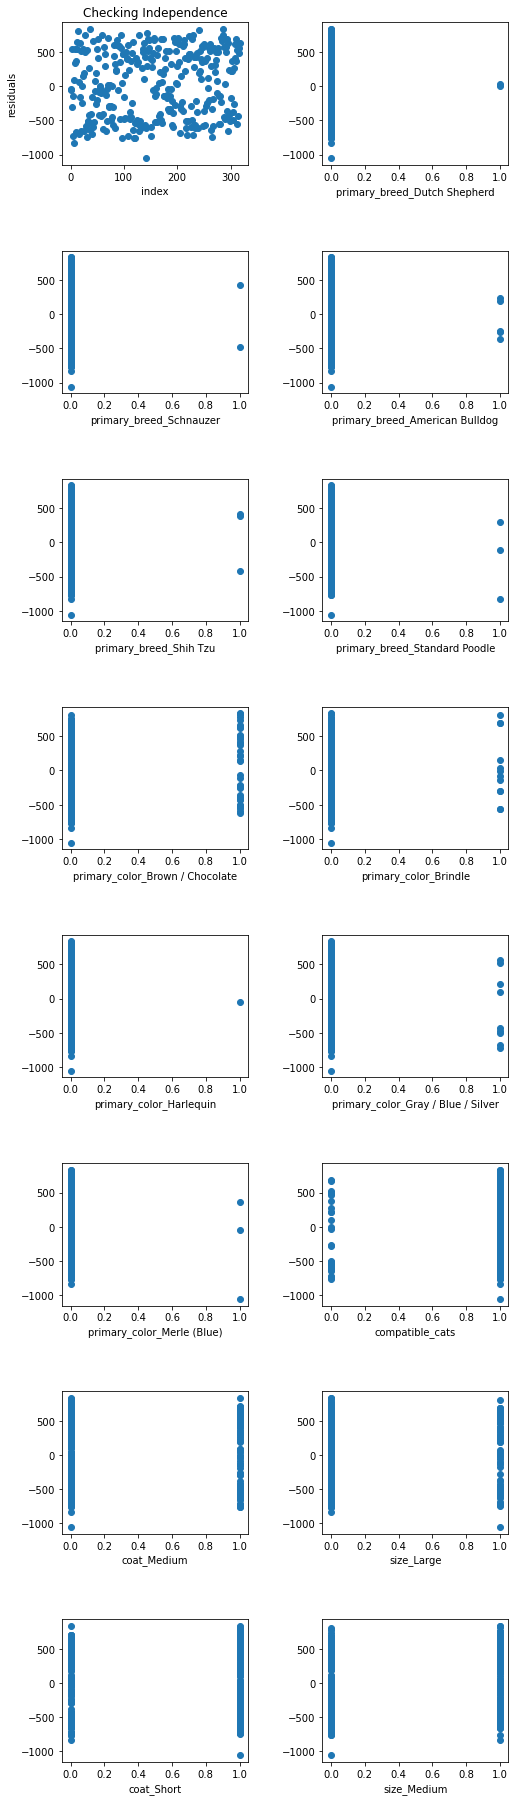

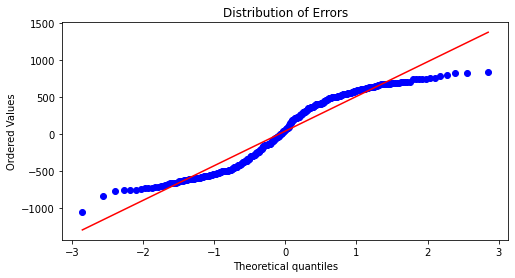

In [106]:
# plot residuals
plot_residuals(Xtest, ytest, y_preds, feat_list=topfeats_tests)

### TRIAL 3.a: Linear Regression on Features Based on Intuition
Features include:

'compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 'coat_Hairless','coat_Medium','primary_breed_Labrador Retriever', 'primary_breed_Maltese','primary_color_Black','primary_color_Brown / Chocolate', 'primary_color_White / Cream', 'primary_color_Yellow / Tan / Blond / Fawn'

In [107]:
intuition_featsA = ['compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 
                   'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 'coat_Hairless', 
                    'coat_Medium','primary_breed_Labrador Retriever', 'primary_breed_Maltese',
                    'primary_color_Black','primary_color_Brown / Chocolate', 'primary_color_White / Cream', 
                   'primary_color_Yellow / Tan / Blond / Fawn']
# create X and Y arrays
X = dogs_df_dummies[intuition_featsA].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 262508.1671532145
The R2 score for the sklearn cross validated model is -0.0478


In [108]:
# determine coefficients and y intercept
coefs = train_model_dogs.coef_
y_int = train_model_dogs.intercept_

In [109]:
# print out the coefficients and their corresponding feature 
print(f'''For the line of best fit for Trial 3a, the:\ny-int: {y_int}\n''')
for index, item in enumerate(intuition_featsA):
     print(f'''{item} coefficient: {coefs[index]}\n''')

For the line of best fit for Trial 3a, the:
y-int: 2537566569809471.5

compatible_children coefficient: 68.24505889468134

compatible_dogs coefficient: -83.09156956561665

compatible_cats coefficient: -82.36853960219051

age_Adult coefficient: 57.47725137435695

age_Baby coefficient: 80.35734899145574

age_Senior coefficient: 112.13758599658483

gender_Female coefficient: -2537566569808618.0

gender_Male coefficient: -2537566569808601.5

size_Medium coefficient: -112.94539634173188

coat_Hairless coefficient: -587.3765289463132

coat_Medium coefficient: -45.89457399742131

primary_breed_Labrador Retriever coefficient: -109.47008802186548

primary_breed_Maltese coefficient: -155.6087483401719

primary_color_Black coefficient: 30.645575571545578

primary_color_Brown / Chocolate coefficient: -180.92059766701297

primary_color_White / Cream coefficient: -68.27839091973179

primary_color_Yellow / Tan / Blond / Fawn coefficient: 20.75662378935071



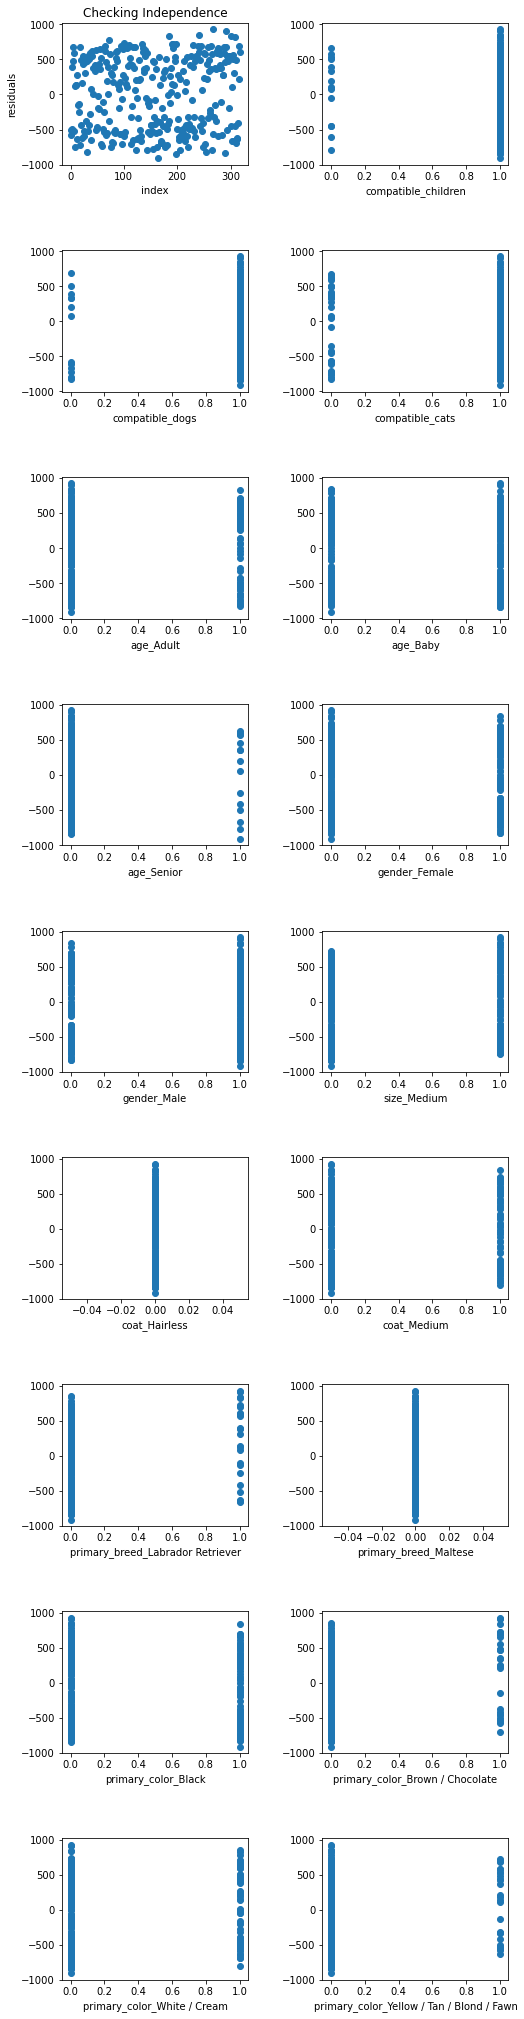

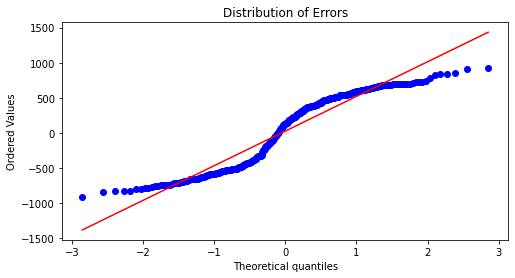

In [110]:
# plot residuals
plot_residuals(Xtest, ytest, y_preds, feat_list=intuition_featsA)

### TRIAL 3.b: Linear Regression on Features Based on Intuition - Reduced List
Features include:

'compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 'size_Small', 'size_Large'

In [9]:
intuition_featsB = ['compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 
                   'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 
                   'size_Small', 'size_Large']
# create X and Y arrays
X = dogs_df_dummies[intuition_featsB].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 259394.77555730255
The R2 score for the sklearn cross validated model is -0.0423


In [10]:
# determine coefficients and y intercept
coefs = train_model_dogs.coef_
y_int = train_model_dogs.intercept_

In [11]:
# print out the coefficients and their corresponding feature 
print(f'''For the line of best fit for Trial 3b, the:\ny-int: {y_int}\n''')
for index, item in enumerate(intuition_featsB):
     print(f'''{item} coefficient: {coefs[index]}\n''')

For the line of best fit for Trial 3b, the:
y-int: -1.2231650208392372e+16

compatible_children coefficient: 49.17585925123935

compatible_dogs coefficient: 18.00641036166906

compatible_cats coefficient: -129.35625618979398

age_Adult coefficient: 82.4091212514956

age_Baby coefficient: 97.74211391342138

age_Senior coefficient: 135.00554606171522

gender_Female coefficient: 1.2231650208393484e+16

gender_Male coefficient: 1.2231650208393542e+16

size_Medium coefficient: -472.4828563782838

size_Small coefficient: -375.09321144072015

size_Large coefficient: -392.8691509253399



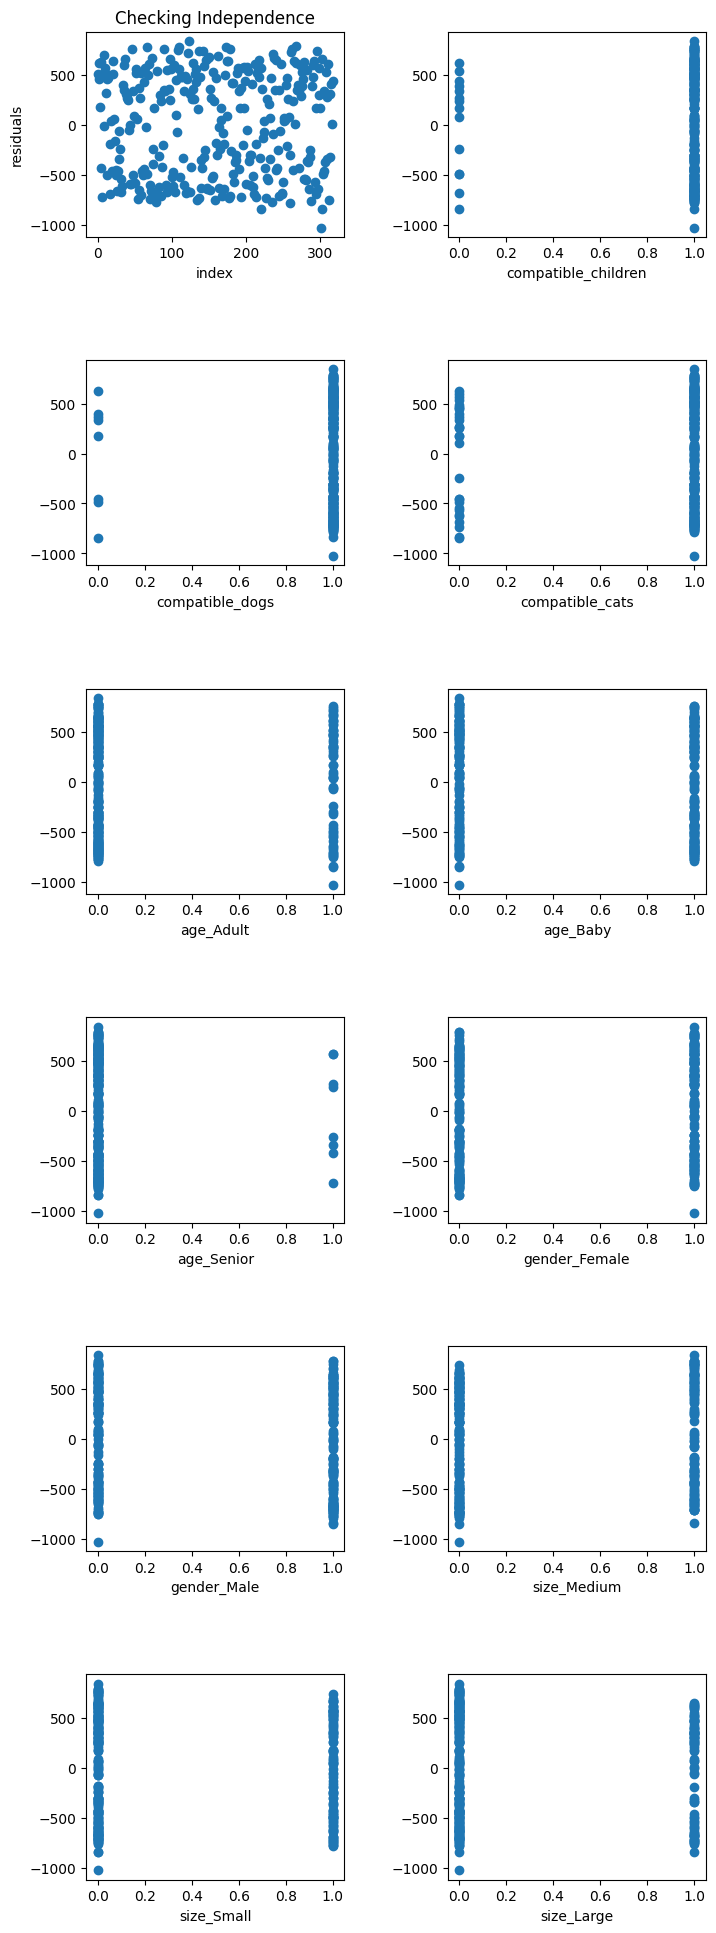

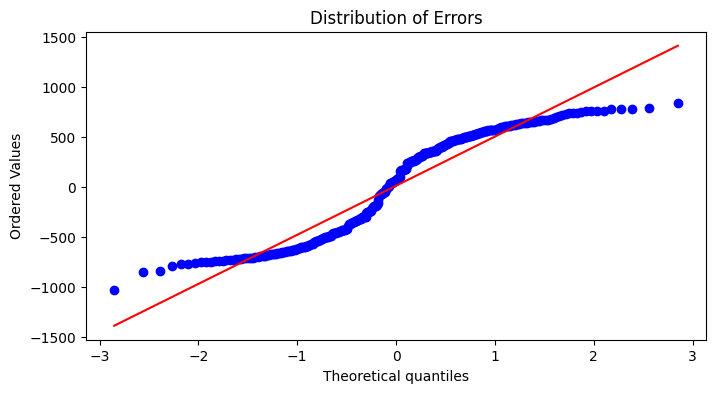

In [14]:
# plot residuals
plot_residuals(Xtest, ytest, y_preds, feat_list=intuition_featsB)